# [Analyse] du discours d'un climato-sceptique: François Gervais. (1/2) 
 Watch [le reveilleur](https://www.youtube.com/watch?v=XGq4WRTLfvc) to place this study into context. We discuss fitting procedure of the Fig. 2 and Fig. 3 extracted from [1]
<br><br>Fits the yearly/monthly earth mean temrerature anomaly $\delta T(t)$ with the objective funtion: $$\begin{array}{l}
\\
\delta T(t) = a + bt + c\sin \left( {\frac{{2\pi t}}{T} + \varphi } \right)
\end{array}$$ <br>with $t \in \left[ {180,2019} \right]$. The data are available [here](https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/download.html) (choose Global (NH+SH)/2 per year or/and per month. Copy and paste the data in a texte file. 
<br><br>The data are orgaized as follow :
- Column 0 is the date.
- Column 1 is the median of the 100 ensemble member time series.
- Columns 2 and 3 are the lower and upper bounds of the 95% confidence interval of bias uncertainty computed from the 100 member ensemble.
- Columns 4 and 5 are the lower and upper bounds of the 95% confidence interval of measurement and sampling uncertainties around the ensemble median. These are the combination of fully uncorrelated measurement and sampling uncertainties and partially correlated uncertainties described by the HadCRUT4 error covariance matrices.
- Columns 6 and 7 are the lower and upper bounds of the 95% confidence interval of coverage uncertainties around the ensemble median.
- Columns 8 and 9 are the lower and upper bounds of the 95% confidence interval of the combination of measurement and sampling and bias uncertainties.
- Columns 10 and 11 are the lower and upper bounds of the 95% confidence interval of the combined effects of all the uncertainties described in the HadCRUT4 error model (measurement and sampling, bias and coverage uncertainties).

For further information François-Marie Béon wrote a critical review of the Gervais' book [here](https://www.lemonde.fr/sciences/article/2013/10/28/les-contre-verites-du-dernier-pamphlet-climatosceptique_3504317_1650684.html). 
- [1] [Gervais,F. *Anthropogenic CO 2 Warming Challenged by 60-Year Cycle* Earth-Science Reviews 155 (2016)](www.sciencedirect.com/science/article/abs/pii/S0012825216300277)

ajustement sur la période de 1875 à 2019


matrice de corrélation:

         a      b     am      T    phi
a    1.000 -1.000  0.996  0.999  0.999
b   -1.000  1.000 -0.996 -0.998 -0.998
am   0.996 -0.996  1.000  0.996  0.996
T    0.999 -0.998  0.996  1.000  1.000
phi  0.999 -0.998  0.996  1.000  1.000


coefficients (a+b.t+am.(sin(2.pi.t/T+phi)):
                   
a    -0.551+/-0.011
b       0.007+/-0.0
am    0.166+/-0.005
T    66.669+/-0.681
phi   1.591+/-0.096


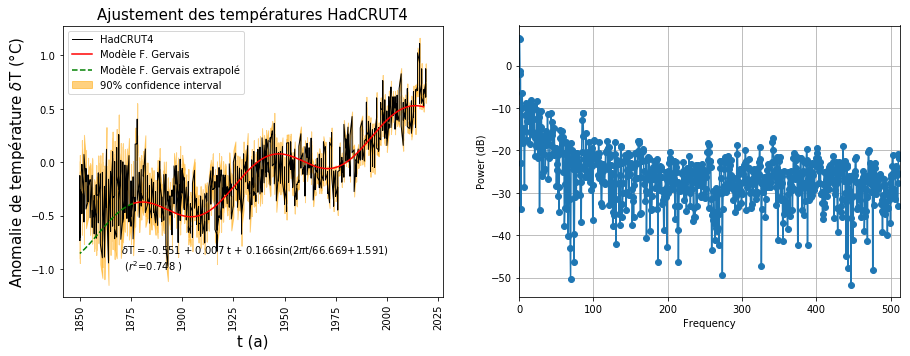

In [80]:
'''Fits the Fig.2 of the HadCRUT4 file availabable under:
https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/download.html
with the function a*t+b+c*sin(2*pi*t/T+phi)
auteur F. Bertin'''

import re
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import array_to_latex as a2l
from spectrum import *
import os
%matplotlib inline

# initialization

directory_path=u"C:\Expert senior\coursera\ecologie"
file_name="HadCRUT4m.txt"
os.chdir(directory_path)

year_min=1875 # initial year (yyyy.yy) for the fit
year_max=2019 # final year (yyyy.yy) for the fit
a,b,amp,T,phase=-0.5,0.006,0.1,60,0 # fitting parameters initialization

def Gervais(year,a,b,amp,T,phase): # fitting model
    year=year-year[0]
    return a+b*(year)+amp*np.sin(2*np.pi*(year)/T+phase)

# put the text file into a data frame
df=pd.read_csv("HadCRUT4m.txt",sep="\s+",header=None,index_col=0,parse_dates=True)
year=df.index.year
temp=np.array(df[1])

# plot the raw data
fig=plt.figure(figsize=(15,5))
ax = plt.subplot(121)
plt.plot(year,temp ,'k',label="HadCRUT4",linewidth=1)
plt.fill_between(year,list(df[8]),list(df[9]), alpha=0.5, color='Orange',label='90% confidence interval')
plt.xticks(rotation=90)
plt.xlabel("t (a)",size=15)
plt.ylabel("Anomalie de température $\delta$T (°C)",size=15)
every_nth = 1
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

# fit and plot results
c=[a,b,amp,T,phase]
sigma=np.array(df[9])-np.array(df[8])
year_fit=year[int(np.min(np.where(year>year_min))):int(np.max(np.where(year<year_max)))]
temp_fit=temp[int(np.min(np.where(year>year_min))):int(np.max(np.where(year<year_max)))]
sigma_fit=sigma[int(np.min(np.where(year>year_min))):int(np.max(np.where(year<year_max)))]
c,cov = curve_fit(Gervais,year_fit,temp_fit, [a,b,amp,T,phase],sigma_fit,absolute_sigma=True)
R=r2_score(temp_fit,Gervais(year_fit,*c))
year_plot=np.linspace(min(year_fit),max(year_fit),8000)
temp_plot=Gervais(year_plot,*c)
plt.plot(year_plot ,temp_plot,"r",label="Modèle F. Gervais")
year_plot=np.linspace(min(year_plot),min(year),8000)
temp_plot=Gervais(year_plot,*c)
plt.plot(year_plot ,temp_plot,"--g",label="Modèle F. Gervais extrapolé")
plt.legend(loc=0)
c=[round(x,3) for x in c]
plt.title('Ajustement des températures HadCRUT4',size=15)
error=[np.absolute(cov[i][i])**0.5 for i in range(len(c))]
error=[round(x,3) for x in error]
result='$\delta$T = {} + {} t + {}sin(2$\pi$t/{}+{}) \n ($r^2$={} )'.format(*c,round(R,3))
ax.text(1870, -1.0 , result, fontsize=10)

# spectral analysis
ax1 = plt.subplot(122)
p = Periodogram(temp_fit, sampling=1024, window='hann')
p.plot(marker='o')

# print result
df = pd.DataFrame(cov)
df.columns=["a","b",'am','T','phi']
print("ajustement sur la période de {} à {}".format(year_min,year_max))
print("\n")
corr = df.corr().round(3)
print("matrice de corrélation:\n")
print(corr)
c=[str(x[0])+"+/-"+str(x[1]) for x in zip(c,error)]
dg=pd.DataFrame(c,columns=[""])
dg.index=["a","b",'am','T','phi']
print("\n")
print("coefficients (a+b.t+am.(sin(2.pi.t/T+phi)):")
print(dg)

Text(1980, -1, '$\\delta$S = -0.078 +  0.441 sin(2$\\pi$t/45.573+0.699) \n ($r^2$=0.495 )')

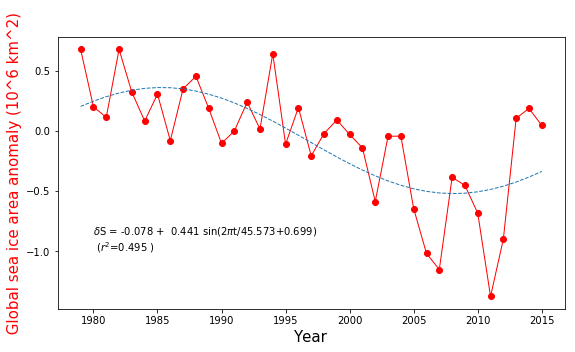

In [3]:
'''Analyse des fichiers HadCRUT4
auteur F. Bertin'''
import re
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import array_to_latex as a2l
from spectrum import *
import os
%matplotlib inline

def Gervais(year,a,amp,T,phase): # fitting model
    year=year-year[0]
    return a+amp*np.sin(2*np.pi*(year)/T+phase)

# Fig 3 digitized with https://automeris.io/WebPlotDigitizer/
data="""Year; Global sea ice area anomaly (10^6 km^2) 
1979; 0.680
1980; 0.203
1981; 0.114
1982; 0.680
1983; 0.323
1984; 0.084
1985; 0.308
1986; -0.079
1987; 0.352
1988; 0.456
1989; 0.189
1990; -0.102
1991; 0.001
1992; 0.241
1993; 0.0173
1994; 0.643
1995; -0.109
1996; 0.196
1997; -0.206
1998; -0.020
1999; 0.092
2000; -0.0273
2001; -0.140
2002; -0.586
2003; -0.0422
2004; -0.0422
2005; -0.6452
2006; -1.0174
2007; -1.1514
2008; -0.3846
2009; -0.4516
2010; -0.6824
2011; -1.375
2012; -0.898
2013; 0.1067
2014; 0.1886
2015; 0.0471"""
yt=[]
s=[]
for i,line in enumerate(data.split('\n')):
    z=line.split(";")
    if i>0:
        yt.append(float(z[0] ))
        s.append(float(z[1] ))
    else:
        label_x=z[0]
        label_y=z[1]
yt=np.array(yt)
s=np.array(s)

fig=plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax1.plot(yt,s,'r',linewidth=1)
ax1.plot(yt,s,'or')
ax1.set_xlabel(label_x,size=15)
ax1.set_ylabel(label_y, color='r',size=15)

a,amp,T,phase=-0.5,0.1,60,0 # fit parameters ininitialization
c,cov = curve_fit(Gervais,yt,s, [a,amp,T,phase])
R=r2_score(s,Gervais(yt,*c))
ax1.plot(yt,Gervais(yt,*c),'--',linewidth=1)
c=[round(x,3) for x in c]
result='$\delta$S = {} +  {} sin(2$\pi$t/{}+{}) \n ($r^2$={} )'.format(*c,round(R,3))
ax1.text(1980, -1 , result, fontsize=10)

#  [Analyse] du discours d'un climato-sceptique: François Gervais. (2/2)
Watch [le réveilleur](https://www.youtube.com/watch?v=mqAaokrY1NU) to place this script into context. The figures are extractracted from :
- [P.A. Mayewski et al. Ice core and climate reanalysis analogs to predict Antarctic and
Southern Hemisphere climate changes Quaternary Science Reviews 155 (2017) 50-66 Fig 14](https://www.researchgate.net/publication/310742491_Ice_core_and_climate_reanalysis_analogs_to_predict_Antarctic_and_Southern_Hemisphere_climate_changes)

Temp_fit =-0.0077436* t + -0.9826
r^2 = 0.07004672817557711


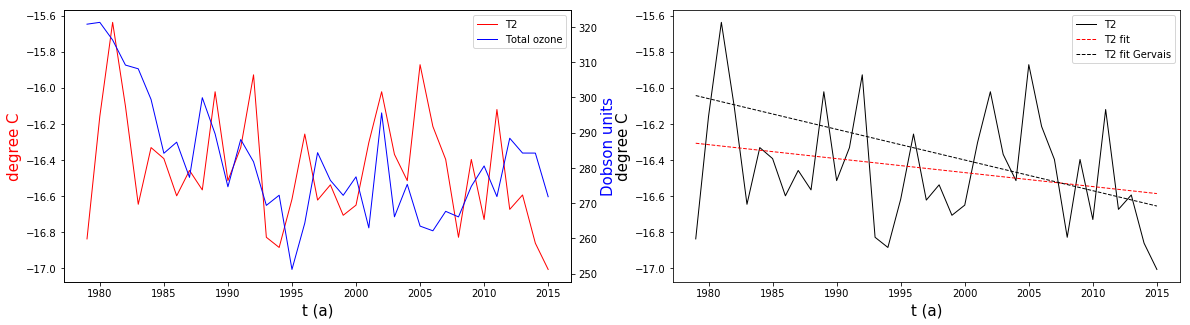

In [22]:
'''Fit of the Fig. 14 extracted from P.A. Mayewski et al. Quaternary Science Reviews 155 (2017) 50-66
https://www.sciencedirect.com/science/article/pii/S0277379116305479
auteur F. Bertin
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
%matplotlib inline


# Fig 14 digitized with https://automeris.io/WebPlotDigitizer/
data='''Year; Ozone (Dobson unit); T2 (°C)
1979.0; 320.79; -16.837
1980.0; 321.31; -16.158
1981.0; 316.30; -15.6375
1982.0; 309.19; -16.1016
1983.0; 308.13; -16.6453
1984.0; 299.43; -16.3312
1985.0; 284.16; -16.3922
1986.0; 287.31; -16.5984
1987.0; 277.31; -16.4578
1988.0; 299.93; -16.5656
1989.0; 289.66; -16.0219
1990.0; 274.65; -16.5141
1991.0; 288.07; -16.3312
1992.0; 281.74; -15.9281
1993.0; 269.37; -16.8281
1994.0; 272.25; -16.8844
1995.0; 251.19; -16.6172
1996.0; 264.34; -16.2562
1997.0; 284.34; -16.6219
1998.0; 276.47; -16.5375
1999.0; 272.22; -16.7062
2000.0; 277.47; -16.6500
2001.0; 262.99; -16.3031
2002.0; 295.62; -16.0219
2003.0; 266.13; -16.3687
2004.0; 275.34; -16.5141
2005.0; 263.49; -15.8719
2006.0; 262.16; -16.2141
2007.0; 267.68; -16.3969
2008.0; 266.10; -16.8281
2009.0; 274.77; -16.3969
2010.0; 280.56; -16.7297
2011.0; 271.86; -16.1203
2012.0; 288.43; -16.6734
2013.0; 284.22; -16.5937
2014.0; 284.21; -16.8609
2015.0; 271.83; -17.0062'''

yt=[]
temp=[]
ozone=[]
for i,line in enumerate(data.split('\n')):
    if i>0: # skip the header
        z=line.split(";")
        yt.append(float(z[0] ))
        ozone.append(float(z[1] ))
        temp.append(float(z[2] ))

fig=plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = ax1.twinx()
lns1 = ax1.plot(yt,temp,'r',linewidth=1,label="T2")
lns2 = ax2.plot(yt,ozone,'b',linewidth=1,label="Total ozone")
ax1.set_xlabel("t (a)",size=15)
ax1.set_ylabel('degree C', color='r',size=15)
ax2.set_ylabel("Dobson units",color='b',size=15)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

a, b, r_value, p_value, std_err = stats.linregress(yt, temp)
R=r2_score(temp,a*np.array(yt)+b)
print("Temp_fit ="+str(round(a,7))+"* t"+" + "+str(round(b,4)))
print("r^2 =",R)
ax1 = fig.add_subplot(122)
ax1.plot(yt,temp,'k',linewidth=1,label="T2")
ax1.plot(yt,a*np.array(yt)+b,'--r',linewidth=1,label="T2 fit")
ax1.plot(yt,-0.017*np.array(yt)+17.6,'--k',linewidth=1,label="T2 fit Gervais")
ax1.set_xlabel("t (a)",size=15)
ax1.set_ylabel('degree C', color='k',size=15)
plt.legend()

# climat: le vrai et le faux (V. Masson-Delmotte) Fig.7
voir également:
- https://www.lemonde.fr/blog/huet/2019/02/07/climat-2018-les-courbes-les-cartes-et-le-soleil/


Text(0, 0.5, 'Anomalie de température $\\delta$T (°C)')

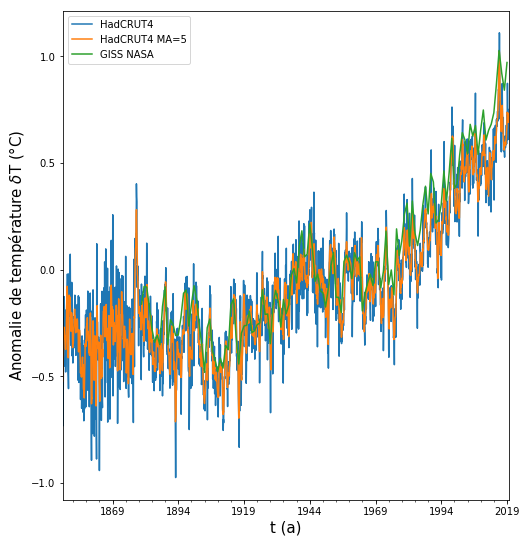

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

directory_path=u"C:\Expert senior\coursera\ecologie"
os.chdir(directory_path)
MA=5

HadCRUT=pd.read_csv("HadCRUT4m.txt",sep="\s+",header=None,index_col=0,parse_dates=True)
ax=HadCRUT[1].plot(figsize=(8,9),label="HadCRUT4")
HadCRUT[1].rolling(window=MA,center=True).mean().plot(label=f"HadCRUT4 MA={MA}")

#  https://data.giss.nasa.gov/gistemp/
GISS=pd.read_csv("GLB.Ts+dSST.csv",index_col="Year",parse_dates=True)
GISS.drop(["J-D","D-N","DJF","MAM","JJA","SON"],axis=1,inplace=True)
GISS=GISS.mean(axis=1)
GISS.plot(label="GISS NASA")
ax.legend(loc=0)
ax.set_xlabel("t (a)",size=15)
ax.set_ylabel("Anomalie de température $\delta$T (°C)",size=15)

# Hiroshima, Tchernobyl, Fukushima... Les morts du nucléaire - Énergie#9
<br>[le réveilleur](https://www.bing.com/videos/search?q=Hiroshima%2c+Tchernobyl%2c+Fukushima...+Les+morts+du+nucl%c3%a9aire+-+%c3%89nergie%239&docid=608007698867556162&mid=A3AC3D55C5803CB93B92A3AC3D55C5803CB93B92&view=detail&FORM=VIRE)  time stamping  41:44
- Tchernobyl : 26 avril 1986 
- L'effondrement du communisme soviétique : 1989-1991: 
<br> The live at birth expectancy is extracted from  https://data.worldbank.org/indicator/SP.DYN.LE00.IN?end=2017&start=1978&view=map&year=2017

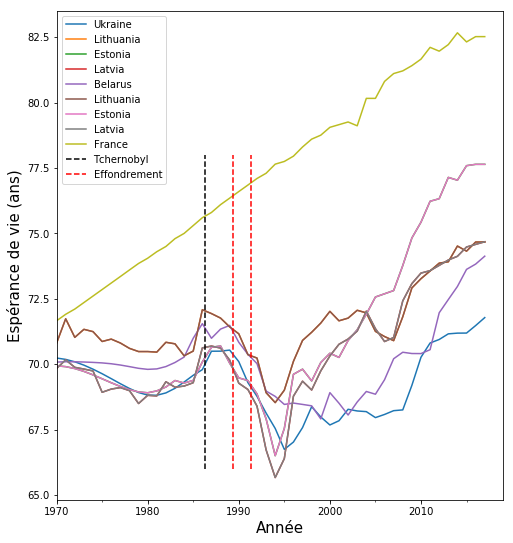

In [302]:
import pandas as pd
import os
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def decimal_year(year,month,day,hour,minute,second):
    '''decimal_year converts a date (year,month,day,hour,minute,second) into a decimal date. credit : Kimvais
     https://stackoverflow.com/questions/6451655/how-to-convert-python-datetime-dates-to-decimal-float-years'''
    d=datetime(year,month,day,hour,minute,second)
    T= (float(d.strftime("%j"))-1) / 366 + float(d.strftime("%Y"))-1970
    return T

Tchernobyl=decimal_year(1986,4,26,0,0,0)
collapse1=decimal_year(1989,5,1,0,0,0)
collapse2=decimal_year(1991,5,1,0,0,0)


#  https://data.worldbank.org/indicator/SP.DYN.LE00.IN?end=2017&start=1978&view=map&year=2017
countries_code=["UKR","LTU","EST","LVA","BLR","LTU","EST","LVA","FRA"] #[,"EST","LVA","ARM","GEO","MDA","AZE","KGZ","UZB","TJK","AZE","TKM","KAZ","KGZ","UZB"]

directory_path=u"C:\Expert senior\coursera\ecologie"
os.chdir(directory_path)


pop = pd.read_excel("API_SP.DYN.LE00.IN_DS2_en_excel_v2_713432.xls",header=3,index_col = 0)
dic={n[1]:n[0] for n in zip(list(pop.index),list(pop["Country Code"]))}
pop.drop(["Country Code","Indicator Name","Indicator Code"],axis=1, inplace=True)
pop=pop.T
pop.index =  pd.to_datetime(pop.index)

countries=[dic[x] for x in countries_code]
ax=pop[countries][10:60] .plot(figsize=(8,9),)
ax.plot([Tchernobyl,Tchernobyl],[66,78],'--k' ,label="Tchernobyl")
ax.plot([collapse1,collapse1],[66,78],'--r',label="Effondrement" )
ax.plot([collapse2,collapse2],[66,78],'--r' )
ax.set_xlabel("Année",size=15)
ax.set_ylabel("Espérance de vie (ans)",size=15)
ax.legend()


# Energie solaire
<br>A conferencce dealing with the sun is available [here](https://www.youtube.com/watch?v=EqkpGPQB2G0)<br>[The solar irradiance](https://en.wikipedia.org/wiki/Solar_irradiance) Etr, Global tilt and direct +circumdolar  are available [here](https://www.nrel.gov/grid/solar-resource/assets/data/astmg173.xls)
- [1] [Laskar J. et al. *Orbital, precessionl, and insolation quantities for te earth from -20Myr to +10Myr* Astron. Astrophys. 270, 522-533 (1993)](http://cdsads.u-strasbg.fr/full/seri/A+A../0270//0000522.000.html)


Surface de panneaux solaire pour produire la puissance consommée en France:  1505.7132918378827 km^2
masse de silicium correspondante : 1678.8703203992393  t


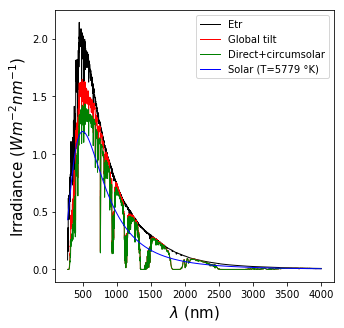

In [10]:
from scipy.constants import c,h,k,e,pi
import pandas as pd
URL='https://www.nrel.gov/grid/solar-resource/assets/data/astmg173.xls'
#A = pd.read_excel('C:\\Users\\franc\\DATA\\ASTMG173.xls',header=1)
A = pd.read_excel(URL,header=1)
DT_S=1.4959787e8  # Distance Terre Soleil km
R_T=6.371e3       # rayon Terre km
R_S=6.957e5       # Rayon soleil km
AM=1.5            # Air mass 41.8°
w=170.e-6         # Wafer thicness m
T=5779            # °K
World_energy=1.35112e10 # tep en 2017
France_energy=2.482e8    # tep en 2017
sigma=2*pi**5*k**4/(15*h**3*c**2)
Omega=sigma*T**4*(R_S/DT_S)**2 # constante solaire
W_terre=Omega*(R_T*1.e3)**2*pi # puissance délivrée par le Soleil sur la Terre
T_terre=World_energy*41.868e9/W_terre/60
T_france=France_energy*41.868e9/W_terre/60
fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
lbd=A["Wvlgth nm"]
lbd_m=lbd*1.e-9;
Lth=1.e-9*(R_S/DT_S)**2*2*pi*h*c**2/(AM*(lbd_m**5*(np.exp(h*c/(lbd_m*k*T))-1))) # Luminance W/m^2
#Nph=Lth*lbd_m/(h*c); % Number of photon/m^2 nm s
#Nph_m=L*lbd_m/(h*c); % Number of photon/m^2 nm s
plt.plot(lbd,A["Etr W*m-2*nm-1"] ,'k',linewidth=1,label="Etr")
plt.plot(lbd,A["Global tilt  W*m-2*nm-1"] ,'r',linewidth=1,label="Global tilt")
plt.plot(lbd,A["Direct+circumsolar W*m-2*nm-1"] ,'g',linewidth=1,label="Direct+circumsolar")
plt.plot(lbd,Lth ,'b',linewidth=1,label="Solar (T="+str(T)+" °K)")
plt.legend(loc=0)
plt.xlabel("$\lambda$ (nm)",size=15)
plt.ylabel("Irradiance $(W{m^{ - 2}}n{m^{ - 1}})$",size=15)
plt.legend(loc=0)
France_energy*41.868e9/(Omega*31536000*0.16*1.e6*0.4)
print( "Surface de panneaux solaire pour produire la puissance consommée en France: ",\
      France_energy*41.868e9/(Omega*31536000*0.16*1.e6),"km^2")
print("masse de silicium correspondante :",France_energy*41.868e9/(Omega*31536000*0.16)*500.e-6*2.23e3*1.e-6," t")


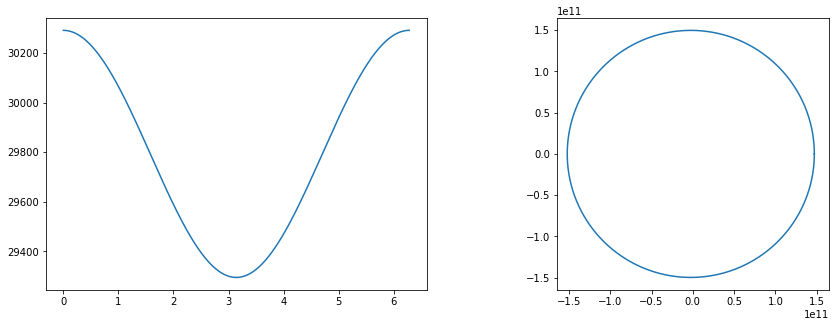

In [11]:
from scipy.constants import G
M=5.9722e24  # mase de la Terre en kg
Ms=1.9891e30 # mase de la Terre en kg
a=149.6e9 # demi grand axe de l'orbite de la Terre en m
e=0.01671123 #exentricité de l'orbite de la Terre
theta=np.linspace(0,2*np.pi,1000)
r=a*(1-e**2)/(1+e*np.cos(theta))
v=np.sqrt(G*Ms*(2/r-1/a))
fig=plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
ax.plot(theta,v)
ax1 = plt.subplot(122, autoscale_on=False, aspect='equal', xlim=[-1.1*a,1.1*a], ylim=[-1.1*a,1.1*a])
ax1.plot(r*np.cos(theta),r*np.sin(theta))

# J.-M. Jancovici

7.04 -14267.92 0.99


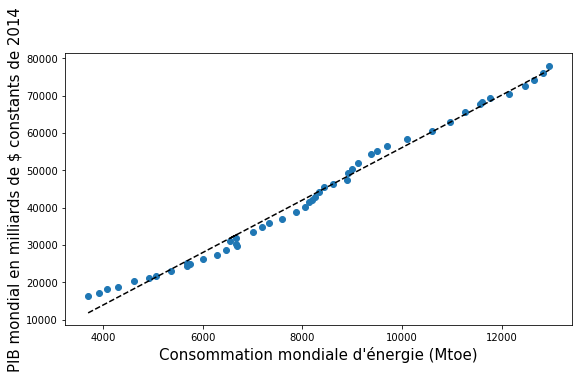

In [9]:
from sklearn.metrics import r2_score
from scipy import stats
import re
import os
%matplotlib inline
def read_txt(file_name):
    file = open(file_name)
    lines = file.readlines()
    file.close()
    v=[]
    for i,line in enumerate(lines):
        v.append([float(x) for x in re.split(';', line)  if len(x)>0])
    x=sum(v, [])[0::2]
    y=sum(v, [])[1::2]
    return x,y

# initialisation
directory_path=u"C:\Expert senior\coursera\ecologie"
os.chdir(directory_path)
file_name="jancovici.txt"
Energ,PIB=read_txt(file_name)

fig=plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax1.plot(Energ,PIB,"o")


a, b, r_value, p_value, std_err = stats.linregress(Energ,PIB)
R=r2_score(PIB,a*np.array(Energ)+b)
ax1.plot(Energ,a*np.array(Energ)+b,"--k")
plt.xlabel("Consommation mondiale d'énergie (Mtoe)",size=15)
plt.ylabel("PIB mondial en milliards de $ constants de 2014",size=15)
print(round(a,2),round(b,2),round(R,3))

7.005242504157876 -15500.11187750868


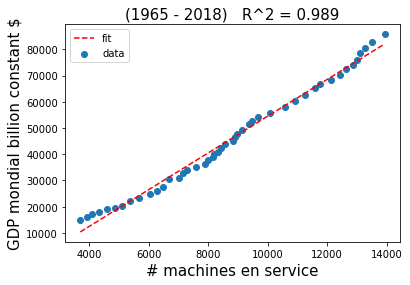

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline


#JMJ GDP versus 3 machines 
data='''3694,656488549619; 14987,08010335917
3923,6641221374057; 16020,671834625303
4083,9694656488555; 17054,263565891466
4312,977099236641; 17829,45736434107
4587,786259541985; 19121,447028423776
4862,59541984733; 19638,242894056835
5091,603053435114; 20413,436692506467
5366,412213740459; 22222,22222222222
5664,122137404582; 23255,813953488366
6053,435114503816; 24806,20155038759
6259,541984732825; 26098,19121447028
6488,5496183206105; 27390,180878552972
6694,656488549617; 30490,95607235143
7015,2671755725205; 31007,75193798449
7152,67175572519; 32816,537467700254
7290,076335877864; 33850,1291989664
7587,786259541985; 35142,118863049094
7885,496183206107; 36434,108527131786
8000,000000000002; 37984,49612403101
8160,305343511451; 39018,087855297155
8206,106870229008; 40051,6795865633
8320,610687022901; 40826,87338501292
8435,114503816794; 42377,26098191216
8572,519083969466; 43927,648578811364
8847,32824427481; 44961,24031007753
8893,129770992367; 46511,62790697675
8961,832061068702; 47803,617571059425
9122,137404580153; 49354,00516795866
9374,045801526717; 51421,18863049097
9465,648854961831; 52713,178294573656
9671,755725190838; 54263,56589147287
10061,068702290076; 55555,555555555555
10587,786259541984; 57881,1369509044
10931,297709923665; 60206,71834625324
11251,908396946564; 62532,29974160207
11595,419847328245; 65116,27906976745
11755,725190839693; 66925,06459948321
12122,137404580153; 68217,0542635659
12442,748091603052; 70284,2377260982
12625,95419847328; 72351,4211886305
12877,862595419845; 74160,20671834626
12992,36641221374; 75968,99224806201
13106,87022900763; 78552,9715762274
13267,175572519083; 80620,1550387597
13519,083969465647; 82945,73643410853
13931,297709923665; 85788,11369509045'''
def linear_fit(data,label):
    size=15
    x=[]
    y=[]
    for i,line in enumerate(data.split('\n')):
        z=line.split(";")
        x.append(float(z[0].replace(",",".") ))
        y.append(float(z[1].replace(",",".")  ))
    x=np.array(x).reshape((i+1,1))
    y=np.array(y).reshape((i+1,1))
    plt.scatter(x ,y,label="data")
    model=LinearRegression()
    model.fit(x,y)
    a=model.coef_
    b=model.intercept_
    r2=model.score(x,y)
    prediction=model.predict(x)
    plt.plot(x,prediction,"--r",label="fit")
    plt.xlabel(label["x"],size=size)
    plt.ylabel(label["y"],size=size)
    plt.title(label["title"]+"   R^2 = "+str(round(r2,3)),size=size)
    plt.legend(loc=0)
    print(np.ravel(a)[0],np.ravel(b)[0])

label={"x":"# machines en service",
           "y": "GDP mondial billion constant $",
           "title": "(1965 - 2018)"}
linear_fit(data,label)

In [ ]:
import numpy as np
import requests
from bs4 import BeautifulSoup

import pandas as pd
import requests

import matplotlib           
import matplotlib.pyplot as plt

def convert_pop(df):
    pop=[]
    for x in list(df["Million"]):
        if len(x)==2:
            try:
                pop.append(float(x))
            except:
                pop.append(67.2)
        else:
            pop.append(float(x)/10)
    return pop

url = "https://fr.wikipedia.org/wiki/Énergie_en_France"
response = requests.get(url)
df = pd.read_html(response.content,header=2)[1]
df.drop(df.tail(1).index,inplace=True)
df.Mtep = df.Mtep.astype(float)
df.Année = df.Année.astype(float)
pop=convert_pop(df)
fig=plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax1.plot(np.array(list(df["Année"])),np.array(df["Mtep"])/pop,"o") 